In [1]:
import numpy as np
from scipy import interpolate
from scipy.special import lpn
from scipy.special import lpmn
from classy import Class
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
from matplotlib.lines import Line2D
from itertools import cycle

# same size as in latex
font_factor = 10.88 / 12
main_font_size = 12 * font_factor
axes_font_size = 10 * font_factor

from matplotlib_stylesheet import group05_style_sheet, style_rest, set_size
plt.rcParams.update(group05_style_sheet)

figures = "./figures_labday1/"

colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


# defining names for the colors
turquois = '#66c2a5'
red = '#fc8d62'
blue = '#8da0cb'
purple = '#e78ac3'
green = '#a6d854'
yellow = '#ffd92f'
orange = '#e5c494'
grey = '#b3b3b3'

color_arr = [turquois, red, blue]

# P1.1

In [2]:
# Set up the input parameters #
Omega_m = 0.3 # matter density parameter
Omega_b = 0.043 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.96 # scalar spectral index
sigma8 = 0.81 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo = Class()
Cosmo.set(commonsettings)
Cosmo.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo.Hubble(0.5))
print(Cosmo.angular_distance(1.0))
print(Cosmo.pk(1.0, 0.2))

0.00030558821767932766
1651.762983151996
562.0339987022543


findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.


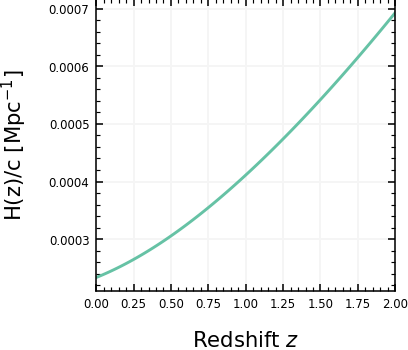

In [3]:
# P1.1, plotting angular_distance and hubble parameter and com. dist over z

redshifts = np.linspace(0,2,100)

fig, ax = plt.subplots(figsize = set_size(fraction=0.5, height_factor=1))
hubble_param_array = [Cosmo.Hubble(z) for z in redshifts]
ax.plot(redshifts, hubble_param_array)
ax.set_xlim(redshifts[0], redshifts[-1])
ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"H(z)/c $[\mathrm{Mpc}^{-1}]$")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible=False)
plt.savefig(f"{figures}p11_hubble_param.svg")
plt.show()

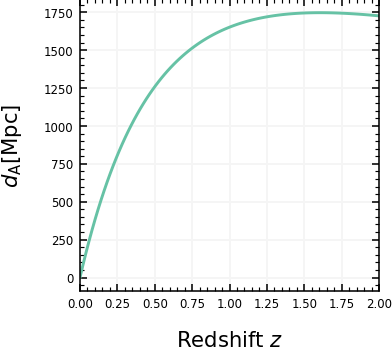

In [4]:
ang_dist_array = [Cosmo.angular_distance(z) for z in redshifts]
fig, ax = plt.subplots(figsize = set_size(fraction=0.5, height_factor=1))
ax.plot(redshifts, ang_dist_array)
ax.set_xlim(redshifts[0], redshifts[-1])
ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"$d_{\mathrm{A}}[\mathrm{Mpc}]$")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible=False)
plt.savefig(f"{figures}p11_angdist.svg")
plt.show()

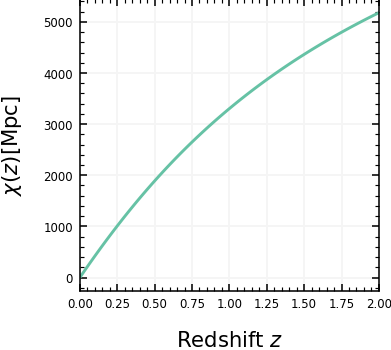

In [5]:
def comoving_distance(redshift, angular_distance):
    return (1+redshift)*angular_distance

com_dist_array = [comoving_distance(z,ang)
                  for z, ang in zip(redshifts, ang_dist_array)]

fig, ax = plt.subplots(figsize = set_size(fraction=0.5, height_factor=1))
ax.plot(redshifts, com_dist_array)
ax.set_xlim(redshifts[0], redshifts[-1])
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible=False)
ax.set_xlabel("Redshift $z$")
ax.set_ylabel(r"$\chi(z)[\mathrm{Mpc}]$")
plt.savefig(f"{figures}p11_comoving_distance.svg")
plt.show()

findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.


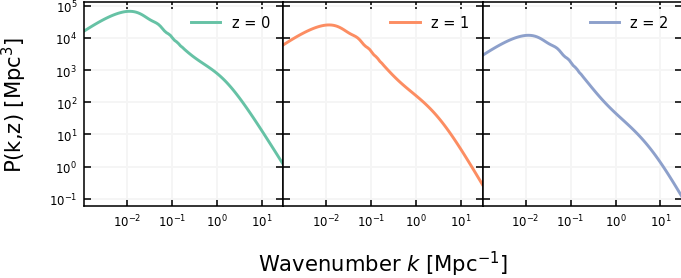

In [6]:

wavenumbers = np.geomspace(0.0011, 30, 100)

redshift = [0,1,2]
pk_array = [[Cosmo.pk(wave, z) for wave in wavenumbers] for z in redshift]

fig, axs = plt.subplots(ncols = 3, nrows = 1, sharex = True, sharey = True, 
                        figsize=set_size(height_factor=0.35))

axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.loglog(wavenumbers, pk_array[i], label = f"z = {redshift[i]}", 
              color = color_arr[i])
    ax.set_xlim(wavenumbers[0], wavenumbers[-1])
    ax.legend(loc = "upper right", fontsize=7.5)
    ax.tick_params(axis="both", which="minor", bottom=False, top=False, 
                   left=False, right=False)
    ax.grid(True, which="major", linewidth = 1)
    ax.grid(which="minor", linewidth = 0.3, visible = False)



axs[1].set_xlabel(r"Wavenumber $k$ [$\mathrm{Mpc}^{-1}$]")
axs[0].set_ylabel(r"P(k,z) [$\mathrm{Mpc}^3}$]")
plt.subplots_adjust(wspace=0)
plt.savefig(f"{figures}P11_power.svg")
plt.show()


# P1.2

In [7]:
# Set up the input parameters #
Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings_t1 = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo_t = Class()
Cosmo_t.set(commonsettings_t1)
Cosmo_t.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo_t.Hubble(0.5))
print(Cosmo_t.angular_distance(1.0))
print(Cosmo_t.pk(1.0, 0.2))

0.00030110626218776996
1672.860203880349
585.0948825874536


# P1.Optional

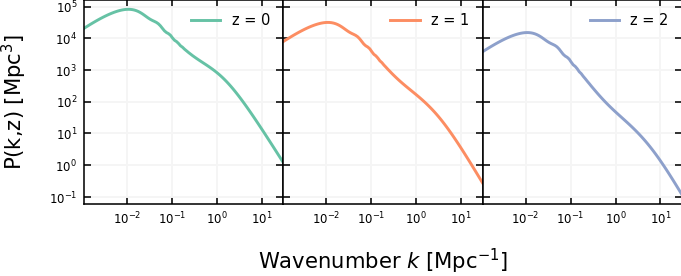

In [8]:

wavenumbers = np.geomspace(0.0011, 30, 100)
redshifts = np.linspace(0,2,100)
redshift_arr = [0,1,2]
pk_array_t = [[Cosmo_t.pk(wave, z) for wave in wavenumbers] for z in [0,1,2]]

fig, axs = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, 
                        figsize=set_size(height_factor=0.35))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.loglog(wavenumbers, pk_array_t[i], label = f"z = {redshift_arr[i]}", 
              color = color_arr[i])
    ax.set_xlim(wavenumbers[0], wavenumbers[-1])
    ax.tick_params(axis="both", which="minor", bottom=False, top=False, 
                   left=False, right=False)
    ax.legend(loc = "upper right", fontsize=7.5)
    ax.grid(True, which="major", linewidth = 1)
    ax.grid(which="minor", linewidth = 0.3, visible = False)

axs[1].set_xlabel(r"Wavenumber $k$ [$\mathrm{Mpc}^{-1}$]")
axs[0].set_ylabel("P(k,z) [$\mathrm{Mpc}^3$]")
plt.subplots_adjust(wspace=0)
plt.savefig(f"{figures}p1O_power_lin.svg")
plt.show()

In [9]:
# Set up the input parameters #
Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
#nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings_t2 = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo_t2 = Class()
Cosmo_t2.set(commonsettings_t2)
Cosmo_t2.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo_t2.Hubble(0.5))
print(Cosmo_t2.angular_distance(1.0))
print(Cosmo_t2.pk(1.0, 0.2))

0.00030110626218776996
1672.860203880349
67.74773779595677


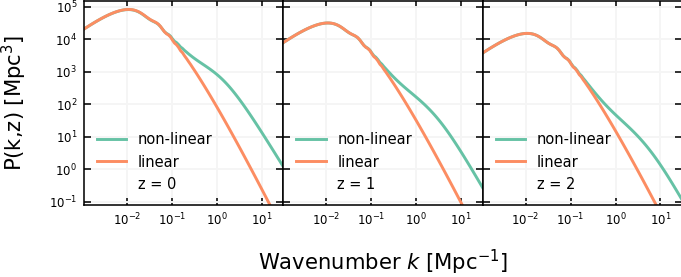

In [10]:

wavenumbers = np.geomspace(0.0011, 30, 100)
redshifts = np.linspace(0,2,100)
redshift_arr = [0,1,2]
pk_array_t2 = [[Cosmo_t2.pk(wave, z) for wave in wavenumbers] for z in [0,1,2]]

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, 
                       figsize=set_size(height_factor=0.35))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.loglog(wavenumbers, pk_array_t[i], label = "non-linear")
    ax.loglog(wavenumbers, pk_array_t2[i], label = "linear")
    ax.loglog([],[]," ", color = "none", label = f"z = {redshift_arr[i]}")
    ax.set_xlim(wavenumbers[0], wavenumbers[-1])
    ax.set_ylim(8e-2,1.5e5)
    ax.tick_params(axis="both", which="minor", bottom=False, top=False, 
                   left=False, right=False)
    ax.legend(loc = "lower left", fontsize=7.5)
    ax.grid(True, which="major", linewidth = 1)
    ax.grid(which="minor", linewidth = 0.3, visible = False)

axs[1].set_xlabel(r"Wavenumber $k$ [$\mathrm{Mpc}^{-1}$]")
axs[0].set_ylabel("P(k,z) [$\mathrm{Mpc}^3$]")
plt.subplots_adjust(wspace=0)
plt.savefig(f"{figures}P1O_lin_nonlin.svg")
plt.show()


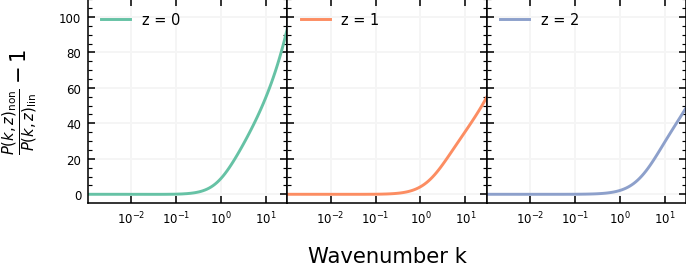

In [11]:
difference = np.array(pk_array_t)/np.array(pk_array_t2) - 1

redshift_arr = [0,1,2]

fig, axs = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, 
                       figsize=set_size(height_factor=0.35))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.semilogx(wavenumbers, difference[i], label = f"z = {redshift_arr[i]}", 
              color = color_arr[i])
    ax.set_xlim(wavenumbers[0], wavenumbers[-1])
    ax.set_ylim(-5,1.1e2)
    ax.tick_params(axis="x", which="minor", bottom=False, top=False, 
                   left=False, right=False)
    ax.legend(loc = "upper left", fontsize=7.5)
    ax.grid(True, which="major", linewidth = 1)
    ax.grid(which="minor", linewidth = 0.3, visible = False)
    
axs[1].set_xlabel("Wavenumber k")
axs[0].set_ylabel(r"$\frac{P(k,z)_{\mathrm{non}}}{P(k,z)_{\mathrm{lin}}}-1$")
plt.subplots_adjust(wspace=0)
plt.savefig(f"{figures}P1O_diff.svg")
plt.show()
nonlinear_model = "Halofit" # nonlinear modelling recipe


# P1.3

In [12]:
'''
settings_t3 = commonsettings

# VARIATION OF OMEGA_CDM

old_omega_cdm = commonsettings["omega_cdm"]
settings_t3_cdm = commonsettings
# get the model with 1.05 percent the omega_cdm value
Cosmo_t3_cdm_high = Class()
settings_t3_cdm["omega_cdm"] = old_omega_cdm * 1.05
Cosmo_t3_cdm_high.set(settings_t3_cdm)
Cosmo_t3_cdm_high.compute()
# get the model with 0.95 percent the omega_cdm value
Cosmo_t3_cdm_low = Class()
settings_t3_cdm["omega_cdm"] = old_omega_cdm * 0.95
Cosmo_t3_cdm_low.set(settings_t3_cdm)
Cosmo_t3_cdm_low.compute()
# plot them in comparison with reference at 1.0 * omega_cdm
fiducial_pk = pk_array_t[0]
pk_array_t3_cdm_high = [Cosmo_t3_cdm_high.pk(wave, 0) for wave in wavenumbers]
pk_array_t3_cdm_low = [Cosmo_t3_cdm_low.pk(wave, 0) for wave in wavenumbers]
fig, ax = plt.subplots()
ax.loglog(wavenumbers, fiducial_pk)
ax.loglog(wavenumbers, pk_array_t3_cdm_high)
ax.loglog(wavenumbers, pk_array_t3_cdm_low)
plt.show()

# VARIATION OF OMEGA_B

old_omega_b = commonsettings["omega_b"]
settings_t3_b = commonsettings
# get the model with 1.05 percent the omega_b value
Cosmo_t3_b_high = Class()
settings_t3_b["omega_b"] = old_omega_b * 1.05
Cosmo_t3_b_high.set(settings_t3_b)
Cosmo_t3_b_high.compute()
# get the model with 0.95 percent the omega_b value
Cosmo_t3_b_low = Class()
settings_t3_b["omega_b"] = old_omega_b * 0.95
Cosmo_t3_b_low.set(settings_t3_b)
Cosmo_t3_b_low.compute()
# plot them in comparison with reference at 1.0 * omega_b
fiducial_pk = pk_array_t[0]
pk_array_t3_b_high = [Cosmo_t3_b_high.pk(wave, 0) for wave in wavenumbers]
pk_array_t3_b_low = [Cosmo_t3_b_low.pk(wave, 0) for wave in wavenumbers]
fig, ax = plt.subplots()
ax.loglog(wavenumbers, fiducial_pk)
ax.loglog(wavenumbers, pk_array_t3_b_high)
ax.loglog(wavenumbers, pk_array_t3_b_low)
plt.show()

# VARIATION OF SIGMA_8

old_omega_sigma = commonsettings["sigma8"]
settings_t3_sigma = commonsettings
# get the model with 1.05 percent the omega_sigma value
Cosmo_t3_sigma_high = Class()
settings_t3_sigma["sigma8"] = old_omega_sigma * 1.05
Cosmo_t3_sigma_high.set(settings_t3_sigma)
Cosmo_t3_sigma_high.compute()
# get the model with 0.95 percent the omega_sigma value
Cosmo_t3_sigma_low = Class()
settings_t3_sigma["sigma8"] = old_omega_sigma * 0.95
Cosmo_t3_sigma_low.set(settings_t3_sigma)
Cosmo_t3_sigma_low.compute()
# plot them in comparison with reference at 1.0 * omega_sigma
fiducial_pk = pk_array_t[0]
pk_array_t3_sigma_high = [Cosmo_t3_sigma_high.pk(wave, 0)
                          for wave in wavenumbers]
pk_array_t3_sigma_low = [Cosmo_t3_sigma_low.pk(wave, 0)
                         for wave in wavenumbers]
fig, ax = plt.subplots()
ax.loglog(wavenumbers, fiducial_pk)
ax.loglog(wavenumbers, pk_array_t3_sigma_high)
ax.loglog(wavenumbers, pk_array_t3_sigma_low)
plt.show()

# VARIATION OF h

old_omega_h = commonsettings["h"]
settings_t3_h = commonsettings
# get the model with 1.05 percent the omega_h value
Cosmo_t3_h_high = Class()
settings_t3_h["h"] = old_omega_h * 1.05
Cosmo_t3_h_high.set(settings_t3_h)
Cosmo_t3_h_high.compute()
# get the model with 0.95 percent the omega_h value
Cosmo_t3_h_low = Class()
settings_t3_h["h"] = old_omega_h * 0.95
Cosmo_t3_h_low.set(settings_t3_h)
Cosmo_t3_h_low.compute()
# plot them in comparison with reference at 1.0 * omega_h
fiducial_pk = pk_array_t[0]
pk_array_t3_h_high = [Cosmo_t3_h_high.pk(wave, 0)
                          for wave in wavenumbers]
pk_array_t3_h_low = [Cosmo_t3_h_low.pk(wave, 0)
                         for wave in wavenumbers]
fig, ax = plt.subplots()
ax.loglog(wavenumbers, fiducial_pk)
ax.loglog(wavenumbers, pk_array_t3_h_high)
ax.loglog(wavenumbers, pk_array_t3_h_low)
plt.show()
'''

'\nsettings_t3 = commonsettings\n\n# VARIATION OF OMEGA_CDM\n\nold_omega_cdm = commonsettings["omega_cdm"]\nsettings_t3_cdm = commonsettings\n# get the model with 1.05 percent the omega_cdm value\nCosmo_t3_cdm_high = Class()\nsettings_t3_cdm["omega_cdm"] = old_omega_cdm * 1.05\nCosmo_t3_cdm_high.set(settings_t3_cdm)\nCosmo_t3_cdm_high.compute()\n# get the model with 0.95 percent the omega_cdm value\nCosmo_t3_cdm_low = Class()\nsettings_t3_cdm["omega_cdm"] = old_omega_cdm * 0.95\nCosmo_t3_cdm_low.set(settings_t3_cdm)\nCosmo_t3_cdm_low.compute()\n# plot them in comparison with reference at 1.0 * omega_cdm\nfiducial_pk = pk_array_t[0]\npk_array_t3_cdm_high = [Cosmo_t3_cdm_high.pk(wave, 0) for wave in wavenumbers]\npk_array_t3_cdm_low = [Cosmo_t3_cdm_low.pk(wave, 0) for wave in wavenumbers]\nfig, ax = plt.subplots()\nax.loglog(wavenumbers, fiducial_pk)\nax.loglog(wavenumbers, pk_array_t3_cdm_high)\nax.loglog(wavenumbers, pk_array_t3_cdm_low)\nplt.show()\n\n# VARIATION OF OMEGA_B\n\nold_ome

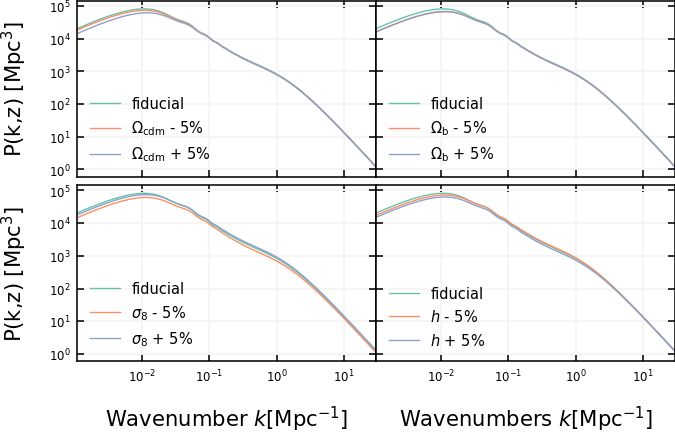

In [13]:
# P1.3 function
# 
# this is a function that does the 5% variations 

def variation(parameter, wave, variation, redshift):
    # setting up the settings for class one time with a parameter reduced by the
    # variation, one time with the parameter increased by the variation
    results = []
    value_old = commonsettings[parameter]
    
    # computing the power spectrum for the reduced parameter
    settings_m = commonsettings.copy()
    settings_m[parameter] = value_old *  (1 - variation)
    Cosmo_var_m = Class()
    Cosmo_var_m.set(settings_m)
    Cosmo_var_m.compute()
    pk_m = np.array([Cosmo_var_m.pk(k, redshift) for k in wave])

    # computing the power spectrum for the increased parameter
    settings_p = commonsettings.copy()
    settings_p[parameter] = value_old * (1 + variation)
    Cosmo_var_p = Class()
    Cosmo_var_p.set(settings_p)
    Cosmo_var_p.compute()
    pk_p = np.array([Cosmo_var_p.pk(k, redshift) for k in wave])

    # saving and returning the results as list of lists with the first element 
    # the reduced, second element the increased parameter
    results.append(pk_m)
    results.append(pk_p)
    return results

fiducial_pk = pk_array_t[0]


parameters = ["omega_cdm", "omega_b", "sigma8", "h"]
parameters_latex = ["$\Omega_{\mathrm{cdm}}$", "$\Omega_{\mathrm{b}}$",
                     "$\sigma_8$", "$h$"]

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, 
                              figsize=set_size())
axs = axs.flatten()
for i,ax in enumerate(axs.flat):
    ax.loglog(wavenumbers, fiducial_pk, label="fiducial", linewidth = 0.7)
    ax.loglog(wavenumbers, variation(parameters[i], wavenumbers, 0.05, 0)[0], 
               label=fr"{parameters_latex[i]} - 5%", linewidth = 0.7)
    ax.loglog(wavenumbers, variation(parameters[i], wavenumbers, 0.05, 0)[1], 
               label=fr"{parameters_latex[i]} + 5%", linewidth = 0.7)
    ax.set_xlim(wavenumbers[0], wavenumbers[-1])
    ax.tick_params(axis="both", which="minor", bottom=False, top=False, 
                   left=False, right=False)
    ax.legend(loc="best", fontsize=7.5)
    ax.grid(True, which="major", linewidth = 1)
    ax.grid(which="minor", linewidth = 0.3, visible = False)

axs[2].set_xlabel(r"Wavenumber $k [\mathrm{Mpc}^{-1}]$")
axs[3].set_xlabel(r"Wavenumbers $k [\mathrm{Mpc}^{-1}]$")
axs[0].set_ylabel("P(k,z) [$\mathrm{Mpc}^3$]")
axs[2].set_ylabel("P(k,z) [$\mathrm{Mpc}^3$]")
plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace=0.05)
plt.savefig(f"{figures}P13_5_percent.svg")
plt.show()

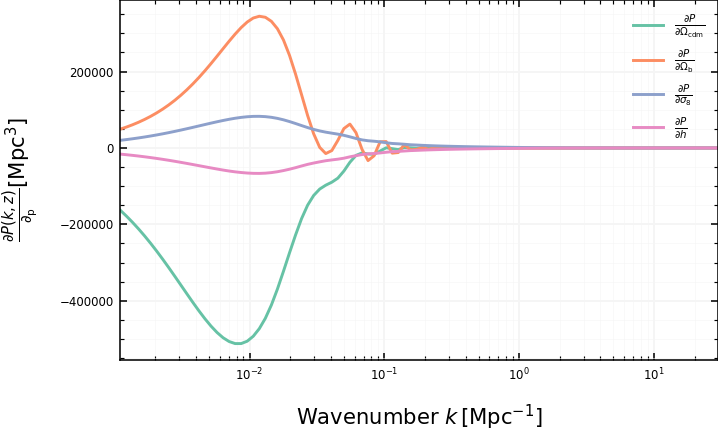

In [14]:
# applying the central difference method to get the partial derivatives of the 
# power spectrum with respect to the interesting parameters

def part_derivative(parameter, wave, h):
    # computing the power spectrum for the normal parameter
    settings_deriv = commonsettings.copy()
    Cosmo_deriv = Class()
    parameter_plus = settings_deriv[parameter] + h
    Cosmo_deriv.set(settings_deriv)
    Cosmo_deriv.compute()
    pk_plus = np.array([Cosmo_deriv.pk(k, 0) for k in wave])
    
    # computing a slightly higher parameter
    parameter_minus = settings_deriv[parameter] - h
    settings_deriv[parameter] = parameter_minus
    Cosmo_deriv.set(settings_deriv)
    Cosmo_deriv.compute()
    pk_minus = np.array([Cosmo_deriv.pk(k, 0) for k in wave])

    # calculating the partial derivative
    part_deriv = (pk_plus - pk_minus) / h / 2
    return part_deriv


parameters = ["omega_cdm", "omega_b", "sigma8", "h"]
parameters_latex = ["\Omega_{\mathrm{cdm}}", "\Omega_{\mathrm{b}}",
                     "\sigma_8", "h"]
accuracy = 0.001

fig, ax = plt.subplots(figsize = set_size())

for i in range(len(parameters)):
    ax.plot(wavenumbers, part_derivative(parameters[i], wavenumbers, accuracy),
             label = fr"$\frac{{\partial P}}{{\partial {parameters_latex[i]}}}$")

ax.set_xlim(wavenumbers[0], wavenumbers[-1])
ax.set_xlabel("Wavenumber $k \, [\mathrm{Mpc}^{-1}]$")
ax.set_ylabel(r"$\frac{\partial P(k,z)}{\partial_{\mathrm{p}}} [\mathrm{Mpc}^3]$")
ax.set_xscale("log")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible = True)
ax.legend(loc = "best", fontsize=7.5)
plt.savefig(f"{figures}P13_partial.svg")
plt.show()


# P1.4

In [15]:
# defining the kernel 

def kernel(redshift_source, redshift, Omega_m):
    angular_distance = Cosmo_t.angular_distance(redshift)
    angular_distance_source = Cosmo_t.angular_distance(redshift_source)
    chi = comoving_distance(redshift, angular_distance)
    chi_s = comoving_distance(redshift_source, angular_distance_source)
    c = const.c.to(u.km / u.s)
    H0 = Cosmo_t.Hubble(0) 
    q = 3/2 * H0**2 * Omega_m * (chi_s - chi) *(1 + redshift) / chi_s * chi
    return q

Materiedichte = 0.279

z_s_1 = 0.5739
z_s_2 = 1.0334

redshift_array_z_s_1 = np.linspace(0, z_s_1, 100)
kernel_1 = kernel(z_s_1, redshift_array_z_s_1, Materiedichte)

redshift_array_z_s_2 = np.linspace(0, z_s_2, 100)
kernel_2 = kernel(z_s_2, redshift_array_z_s_2, Materiedichte)

#print(F"Kernel 1: {kernel_1}")
#print("--------------")
#print(f"Kernel 2: {kernel_2}")


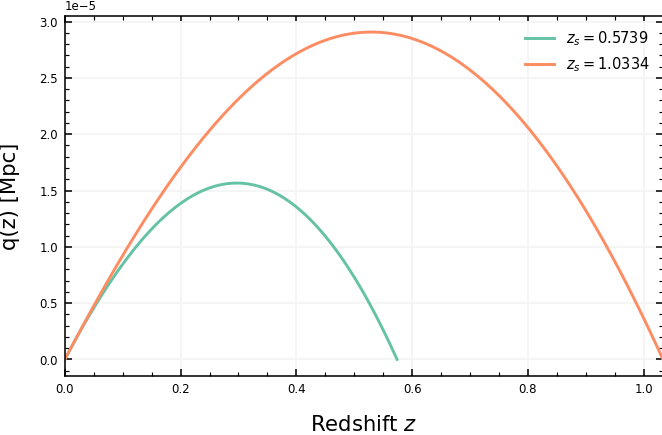

In [16]:
# plotting the lensing kernels against their respective redshift array
fig, ax = plt.subplots(figsize=set_size())
ax.plot(redshift_array_z_s_1, kernel_1, label = fr"$z_s = {z_s_1}$")
ax.plot(redshift_array_z_s_2, kernel_2, label = fr"$z_s = {z_s_2}$")

ax.set_xlim(redshift_array_z_s_2[0], redshift_array_z_s_2[-1])
ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"q(z) [Mpc]")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible = False)
ax.legend(loc = "best", fontsize=7.5)
plt.savefig(f"{figures}P14_kernel.svg")
plt.show()

In the plots the maximum of the kernels is roughly at the center of the intervall observer_redshift -> source_redshift. So roughly at half the source redshift, the weighing is the strongest.

# P1.5

In [17]:
# Write your code here. Add more coding cells as needed.

Materiedichte = 0.279

z_s_1 = 0.5739
z_s_2 = 1.0334

kmax_pk = 1000.0
commonsettings_t5 = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
Cosmo_proj = Class()
Cosmo_proj.set(commonsettings_t5)
Cosmo_proj.compute()

def projection(source_redshift, l):
    z_s = source_redshift
    redshift = np.linspace(0, z_s, 100)

    angular_distance = Cosmo_proj.angular_distance(redshift)
    angular_distance_source = Cosmo_proj.angular_distance(z_s)
    chi = comoving_distance(redshift, angular_distance)
    chi_s = comoving_distance(z_s, angular_distance_source)
    
    c = const.c.to(u.km / u.s)
    H0 = Cosmo_proj.Hubble(0) * c

    C = 9/4 * H0**4 * Materiedichte**2 / c**3
    H = np.array(Cosmo_proj.Hubble(redshift)) * c
    
    power_spec_list = []
    for z in redshift:
        angular_distance = Cosmo_proj.angular_distance(z)
        chi_z = comoving_distance(z, angular_distance)
        k = l / chi_z if chi_z != 0 else np.inf
        P_3d = Cosmo_proj.pk(k, z) if np.isfinite(k) else 0
        power_spec_list.append(P_3d)

    power_spec_arr = np.array(power_spec_list)
    second_term = np.array((chi_s - chi) / chi_s * (1 + redshift))
    Integrand = second_term**2 / H * power_spec_arr
    
    Integral = np.trapz(Integrand, redshift)
    return (C * Integral).value

print(projection(z_s_1, 1000))


1.442092362004667e-10


In [18]:
# plotting the projection

# generating a logarithmic scale 
log_scale = np.unique(np.round(np.logspace(np.log10(2),
                                            np.log10(15000), 112)).astype(int))

print(len(log_scale))

# computing the projection for the array that was created above
proj_source_1 = [projection(z_s_1, l) for l in log_scale]
proj_source_2 = [projection(z_s_2, l) for l in log_scale]

100


findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.


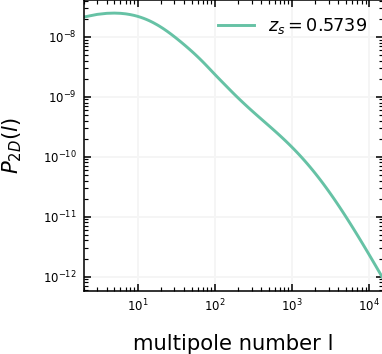

In [19]:
# plotting the projections for the different l values for z_s_1
fig, ax = plt.subplots(figsize=set_size(fraction=0.5, height_factor=1))

ax.loglog(log_scale, proj_source_1, label = fr"$z_s = {z_s_1}$")
ax.legend(loc = "best")
ax.set_xlim(log_scale[0], log_scale[-1])
ax.set_xlabel("multipole number l")
ax.set_ylabel(r"$P_{2D}(l)$")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible = False)
plt.savefig(f"{figures}P15_z_s_{z_s_1}.svg")

plt.show()

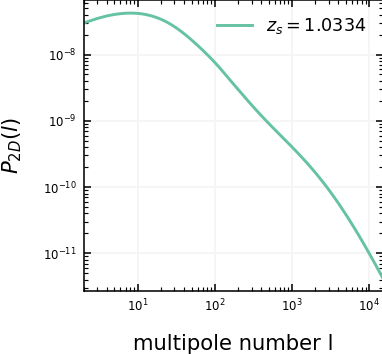

In [20]:
# plotting the projections for the different l values for z_s_2
fig, ax = plt.subplots(figsize=set_size(fraction=0.5, height_factor=1))

ax.loglog(log_scale, proj_source_2, label = fr"$z_s = {z_s_2}$")
ax.legend(loc = "best")
ax.set_xlim(log_scale[0], log_scale[-1])
ax.set_xlabel("multipole number l")
ax.set_ylabel(r"$P_{2D}(l)$")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible = False)
plt.savefig(f"{figures}P15_z_s_{z_s_2}.svg")

plt.show()


### Part of P1.6: Notes about the Kitching correction and interpolation

After all the previous exercises, we already have the projected convergence power spectrum at a discrete set of multipole numbers. Now we first have to interpolate the spectrum to a continuous set of integer numbers from 2 to 15000 so that the integrations in Eq.(57) and (58) can be computed using a summation. Then we have to apply the Kitching correction to convert the 2D flat spectrum to an angular spectrum  

In [21]:
Pk2D = proj_source_1 # read in your previously computed 2D spectrum
l = log_scale # write down the multipole number array at which you compute 2D spectrum in the previous exercise 
l1 = np.linspace(0, 15000, 15001)
l2 = np.linspace(2.5, 15000.5, 14999)

C_ell = np.zeros(len(l1))
C_ell[0] = 0 # what should be the value here?
C_ell[1] = 0 # fill in the value here as well (check Eq.(39)) eq 44?
logl = np.log10(l)
logPk2D = np.log10(Pk2D)
f = interpolate.interp1d(logl, logPk2D, kind='linear', fill_value='extrapolate')
C_ell[2:] = np.power(10.0*np.ones(len(l2)), f(np.log10(l2)))
#kitching correction: turn the power spectrum into the spherical sky under flat-sky approximation
for i in np.asarray(l2, dtype=int):
    C_ell[i] = ((i + 2) * (i + 1) * i * (i - 1) 
                / (i + 0.5)**4 * projection(z_s_1, i + 0.5))

In [22]:
# compute the same for z_s_2 as well
Pk2D_2 = proj_source_2 # read in your previously computed 2D spectrum
l = log_scale # write down the multipole number array at which you compute 2D spectrum in the previous exercise 
l1 = np.linspace(0, 15000, 15001)
l2 = np.linspace(2.5, 15000.5, 14999)

C_ell_2 = np.zeros(len(l1))
C_ell_2[0] = 0 # what should be the value here?
C_ell_2[1] = 0 # fill in the value here as well (check Eq.(39)) eq 44?
logl = np.log10(l)
logPk2D_2 = np.log10(Pk2D_2)
f_2 = interpolate.interp1d(logl, logPk2D_2, kind='linear', fill_value='extrapolate')
C_ell_2[2:] = np.power(10.0*np.ones(len(l2)), f_2(np.log10(l2)))
#kitching correction: turn the power spectrum into the spherical sky under flat-sky approximation
for i in np.asarray(l2, dtype=int):
    C_ell_2[i] = ((i + 2) * (i + 1) * i * (i - 1) 
                / (i + 0.5)**4 * projection(z_s_2, i + 0.5))

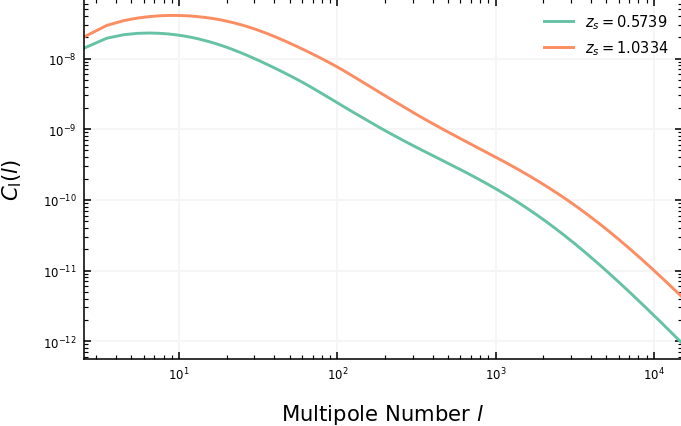

In [23]:
# plotting the projections for the different l values for z_s_2
fig, ax = plt.subplots(figsize=set_size())

ax.loglog(l2, C_ell[2:], label = fr"$z_s = {z_s_1}$")
ax.loglog(l2, C_ell_2[2:], label = fr"$z_s = {z_s_2}$")
ax.legend(loc = "best", fontsize=7.5)
ax.set_xlim(l2[0], l2[-1])
ax.set_xlabel(r"Multipole Number $l$")
ax.set_ylabel(r"$C_{\mathrm{l}}(l)$")
ax.grid(True, which="major", linewidth = 1)
ax.grid(which="minor", linewidth = 0.3, visible = False)
plt.savefig(f"{figures}P_k_corr.svg")
plt.show()




# P1.6

### Part of P1.6: Notes about the Hankel transform

The below two functions will compute the Hankel Transform of the 2D angular power spectrum and convert it to plus and minus shear 2PCFs respectively. 

In the function argument, theta_min and theta_max are the angular bin edges imported above. Here we will compute the average value of 2PCFs within each angular bin. ell is the multipole number array on which you compute the angular power spectrum and C_ell is the angular power spectrum

In [24]:
# Here you have to import three arrays of angular separations from the directory 2PCF_angular_separations
import pandas as pd
directory = "./2PCF_angular_separations/"
#1. The nominal center of each angular separation interval from 5 to 140 arcmin
nominal_center = np.loadtxt(f"{directory}angularsep_arcmins_20bins.txt",
                             dtype = float)
right_edge = np.loadtxt(f"{directory}angularsep_arcmins_max_20bins.txt",
                         dtype = float)
#3. The left edge of each angular bin
left_edge = np.loadtxt(f"{directory}angularsep_arcmins_min_20bins.txt",
                        dtype = float)

nominal_center_rad = nominal_center * 0.000290888
min_rad = left_edge * 0.000290888
max_rad = right_edge * 0.000290888

In [25]:
def xip_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians    
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_p = G_l_2_+(x) + G_l_2_-(x) i.e. LHS of Friedrich++ for the 'p'lus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1] 
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2] 

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1] 
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2] 

    G_l_2_x_p_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            +2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            -2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_p_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

In [26]:
def xim_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians    
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_m = G_l_2_+(x) - G_l_2_-(x) i.e. LHS of Friedrich++ for the 'm'inus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1] 
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2] 

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1] 
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2] 

    G_l_2_x_m_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            -2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            +2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_m_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

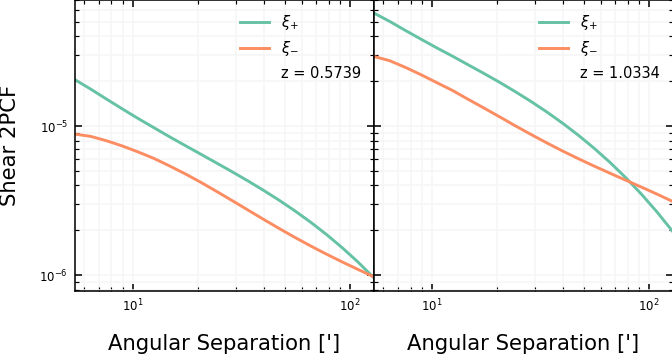

In [27]:
# In this cell you have to think how to use the above two functions to compute 
# the angular bin averaged shear 2PCFs
# hint: you need to loop over angular bins

# the shear 2PCFs for the second source redshift

xi_minus = [[xim_theta_bin_averaged(min_rad[i], max_rad[i], l1, C_ell)
            for i in range(len(min_rad))] , [xim_theta_bin_averaged(min_rad[i], max_rad[i], l1, C_ell_2)
            for i in range(len(min_rad))]]

xi_plus = [[xip_theta_bin_averaged(min_rad[i], max_rad[i], l1, C_ell)
            for i in range(len(min_rad))] , [xip_theta_bin_averaged(min_rad[i], max_rad[i], l1, C_ell_2)
            for i in range(len(min_rad))]]

fig, axs = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, 
                        figsize=set_size(height_factor=0.5)) 

redshift = [z_s_1, z_s_2]
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.loglog(nominal_center, xi_plus[i], label = r"$\xi_{\plus}$")
    ax.loglog(nominal_center, xi_minus[i], label = r"$\xi_{\minus}$")
    ax.loglog([],[]," ", color = "none", label = f"z = {redshift[i]}")
    ax.legend(loc = "best", fontsize=7.5)
    ax.set_xlim(nominal_center[0], nominal_center[-1])

axs[0].set_xlabel("Angular Separation [']")
axs[1].set_xlabel("Angular Separation [']")
axs[0].set_ylabel("Shear 2PCF")
plt.subplots_adjust(wspace=0)
plt.savefig(f"{figures}shear_2PCFs.svg")
plt.show()

In [28]:
# saving the shear 2PCFs

combined = np.column_stack((np.array(xi_minus[0]), np.array(xi_plus[0])))

Header = "xi_minus, xi_plus"

np.savetxt(f"shear_2PCFs_{z_s_1}.txt", combined, delimiter = "\t",
            header = Header)

In [29]:
combined_z_s_2 = np.column_stack((np.array(xi_minus[1]), np.array(xi_plus[1])))

Header = "xi_minus, xi_plus"

np.savetxt(f"shear_2PCFs_{z_s_2}.txt", combined_z_s_2, delimiter = "\t",
            header = Header)